In [18]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [19]:
def ReLU(x):
    return np.maximum(x, 0, x) #ReLU in place, instead of creating a new var this works on the original matrix

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-1.0*x)) #sigmoid function

In [20]:
def feed_forward(features,w1,b1,w2,b2,w3,b3,method=2):
    HL1 = np.matmul(w1,features)
    HL1_with_bias = np.add(HL1,b1)
    HL1_with_bias_and_activation = np.maximum(HL1_with_bias,np.zeros((4,1)))

    HL2 = np.matmul(w2,HL1_with_bias_and_activation)
    HL2_with_bias = np.add(HL2,b2)
    HL2_with_bias_and_activation = np.maximum(HL2_with_bias,np.zeros((3,1)))
    
    targets_predicted = np.matmul(w3,HL2_with_bias_and_activation)
    targets_predicted = np.add(targets_predicted,b3)
    
    if method == 1:
        #Use ReLU for the output activation
        targets_predicted = ReLU(targets_predicted)
    else:
         #Use sigmoid for the output activation
        targets_predicted = sigmoid(targets_predicted)
    return targets_predicted

In [21]:
#Loss function for NN
def loss(features,w1,b1,w2,b2,w3,b3,targets_observed,method=2):
    targets_predicted = feed_forward(features,w1,b1,w2,b2,w3,b3,method)
    return np.sum((targets_predicted-targets_observed)**2)

In [22]:
#Set up training data
#Each row is a case
#Columns 0-4 are features
#Columns 5 & 6 are targets
features_and_targets = np.array( 
                                   [ [0, 0, 0, 0, 0, 0, 1],
                                     [0, 0, 0, 0, 1, 0, 1],
                                     [0, 0, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 1, 1, 0, 1],
                                     [0, 1, 1, 1, 1, 0, 1],
                                     [1, 1, 1, 1, 0, 0, 1],
                                     [1, 1, 1, 0, 0, 0, 1],
                                     [1, 1, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 1, 0, 0, 1],
                                     [1, 0, 1, 1, 0, 0, 1],
                                     [1, 1, 0, 1, 0, 0, 1],
                                     [0, 1, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 0, 1, 0, 1],
                                     [1, 0, 1, 1, 1, 1, 0],
                                     [1, 1, 0, 1, 1, 1, 0],
                                     [1, 0, 1, 0, 1, 1, 0],
                                     [1, 0, 0, 0, 1, 1, 0],
                                     [1, 1, 0, 0, 1, 1, 0],
                                     [1, 1, 1, 0, 1, 1, 0],
                                     [1, 1, 1, 1, 1, 1, 0],
                                     [1, 0, 0, 1, 1, 1, 0]  ]
                           , dtype=float)   
    

In [23]:
#shuffle our cases
np.random.shuffle(features_and_targets)

features = np.transpose(features_and_targets[:,0:5])
targets_observed = np.transpose(features_and_targets[:,5:7])

number_of_features,number_of_cases = features.shape
print("Number of Features: %s" % number_of_features)
print("Number of Cases: %s" % number_of_cases)

Number of Features: 5
Number of Cases: 22


In [24]:
#Set initial weights and biases
np.random.seed(1)  
weights_1 = np.random.randn(4,5)
biases_1 = np.random.randn(4,number_of_cases)

weights_2 = np.random.randn(3,4)
biases_2 = np.random.randn(3,number_of_cases)

weights_3 = np.random.randn(2,3)
biases_3 = np.random.randn(2,number_of_cases)

In [28]:
learning_rate = 0.1

#Find slope functions using autograd
d_by_w1 = grad(loss,1)
d_by_b1 = grad(loss,2)
d_by_w2 = grad(loss,3)
d_by_b2 = grad(loss,4)
d_by_w3 = grad(loss,5)
d_by_b3 = grad(loss,6)

for epoch in range(10000):
    #At each iteration, update weights and biases by subtracting learning_rate x slope 
    weights_1 -= learning_rate* d_by_w1(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_1 -= learning_rate*  d_by_b1(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)  
    weights_2 -= learning_rate* d_by_w2(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_2 -= learning_rate*  d_by_b2(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)   
    weights_3 -= learning_rate* d_by_w3(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_3 -= learning_rate*  d_by_b3(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed) 

    #Print out the latest value of the loss - would expect this to decrease with each iteration
    print(epoch,loss(features,weights_1,biases_1,
                        weights_2,biases_2,
                        weights_3,biases_3,targets_observed))

05
9275 3.0275672153186714e-05
9276 3.027362651879023e-05
9277 3.027208480437237e-05
9278 3.0270282826114176e-05
9279 3.0268553644809427e-05
9280 3.0267015229041803e-05
9281 3.0265109580260917e-05
9282 3.0263601961591797e-05
9283 3.026165995577716e-05
9284 3.0260192866601445e-05
9285 3.025819734458457e-05
9286 3.025676466215665e-05
9287 3.0254714333268435e-05
9288 3.0253175054642528e-05
9289 3.0251376162673383e-05
9290 3.024964812429518e-05
9291 3.0248115194048482e-05
9292 3.024619818584841e-05
9293 3.02447094525158e-05
9294 3.024275865162123e-05
9295 3.0241304446530558e-05
9296 3.0239298669786788e-05
9297 3.0237879783708293e-05
9298 3.023582538228809e-05
9299 3.023427801586379e-05
9300 3.0232496311679666e-05
9301 3.0230751741688355e-05
9302 3.0229241257820536e-05
9303 3.0227315467763336e-05
9304 3.0225839600409097e-05
9305 3.022386385951917e-05
9306 3.0222409127556323e-05
9307 3.0220425382443346e-05
9308 3.0219005428937403e-05
9309 3.021696395365262e-05
9310 3.021540806526579e-05
9311

In [29]:
def __main__():
    user_chose = False
    user_method = 2
    while not user_chose:
        inp = input("Enter 1 for ReLU or 2 for Sigmoid: ")
        if inp == "1":
            print("Using ReLU")
            user_method = 1
            user_chose = True
        elif inp == "2":
            print("Using Sigmoid")
            user_method = 2
            user_chose = True
        else:
            print("You must choose between 1 (ReLU) or 2 (Sigmoid)")
            
    global Targets_Predicted
    Targets_Predicted = feed_forward(features,weights_1,biases_1,
                                          weights_2,biases_2,
                                          weights_3,biases_3,
                                          method=user_method)
    

    print('Features : %s' % features)
    print('Targets : %s' % targets_observed)
    print('Targets predicted : %s' % Targets_Predicted)

In [30]:
#Lets run it the first time, this time we will choose ReLU
__main__()

Using ReLU
Features : [[0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.]]
Targets : [[0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.]]
Targets predicted : [[ 0.          0.          0.          9.38855749  8.33413366  0.
   0.          0.          7.15203534  0.          0.          9.32005284
   0.          0.          7.223597    8.26835346  6.94867855  7.99821945
   0.          0.          0.          0.        ]
 [ 7.70305948  7.73905704 13.21510914  0.          0.          9.72761574
  10.86886721  8.17163349  0.          7.87715969 10.15498105  0.
   9.12809091  5.71102118  0.          0.          0.     

In [31]:
#Lets run it again, this time we will choose sigmoid
__main__()

Using Sigmoid
Features : [[0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.]]
Targets : [[0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.]]
Targets predicted : [[1.10348275e-03 8.73915188e-04 1.21268221e-05 9.99916331e-01
  9.99759880e-01 2.02520269e-04 3.12482921e-04 1.16730600e-03
  9.99217345e-01 1.35399111e-03 1.02362028e-05 9.99910399e-01
  9.02846463e-05 1.77497451e-03 9.99271356e-01 9.99743558e-01
  9.99041018e-01 9.99664052e-01 7.11392859e-04 5.14099674e-05
  1.01002588e-03 6.36336119e-04]
 [9.99548760e-01 9.99564708e-01 9.99998177e-01 1.44091699e-06
  1.20455015e-04 9.99940389e-01 9.99980958e-01 9.997175

In [32]:
N = 22
target1_predicted = Targets_Predicted[0,:]
target2_predicted = Targets_Predicted[1,:]
target1_observed = targets_observed[0,:]
target2_observed = targets_observed[1,:]

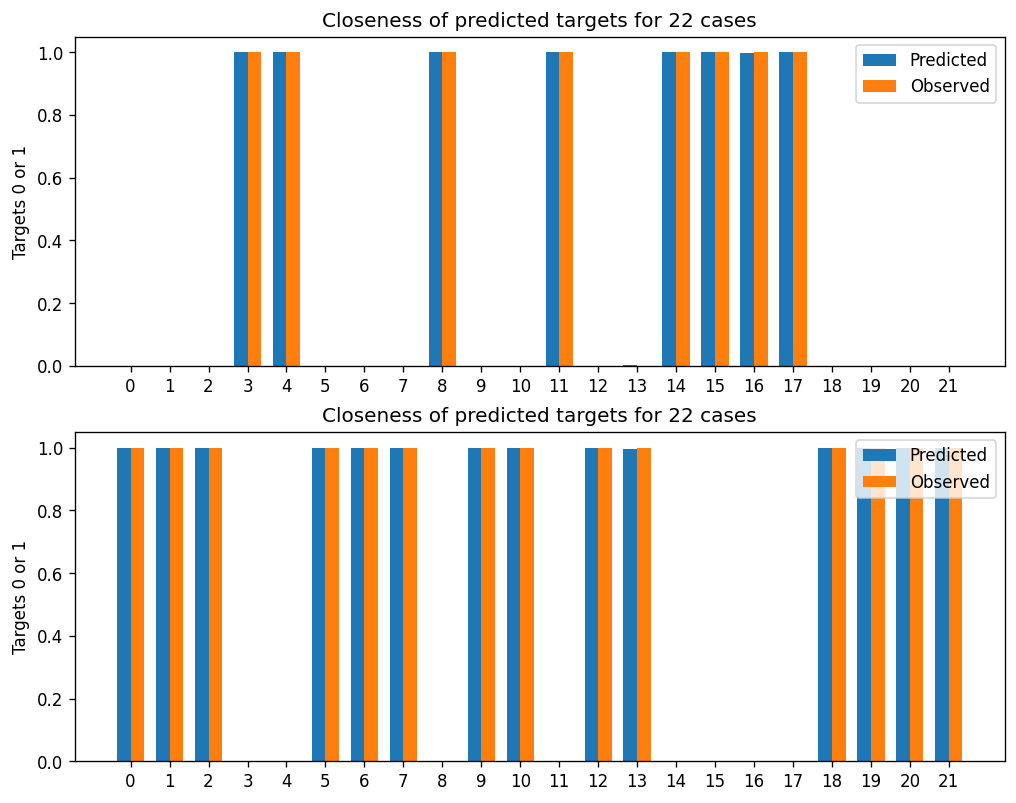

In [33]:
ind = np.arange(N) 
width = 0.35    
figure(figsize=(10, 8), dpi=120) 
plt.subplot(2,1,1)
plt.bar(ind, target1_predicted, width, label='Predicted')
plt.bar(ind + width, target1_observed, width,label='Observed')
plt.ylabel('Targets 0 or 1')
plt.title('Closeness of predicted targets for 22 cases')
plt.xticks(ind + width / 2, ind)
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.bar(ind, target2_predicted, width, label='Predicted')
plt.bar(ind + width, target2_observed, width,label='Observed')
plt.ylabel('Targets 0 or 1')
plt.title('Closeness of predicted targets for 22 cases')
plt.xticks(ind + width / 2, ind)
plt.legend(loc='best')

plt.show()